# TP finance de marché


#### Importations des modules

In [2]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

### Simulation d'un mouvement Brownien

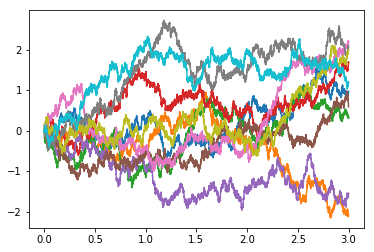

In [3]:
T = 3
n = 10000 #Discretiser le temps
N = 10 # Nombre de trajectoires à simuler
pas = T/n
W = np.zeros((n+1, N)) # Matrice pour stocker les trajectoires (en vecteurs colonnes)
dates = np.linspace(0, T, n+1)

for j in range(N):
    for i in range(1, n+1):
        W[i, j] = W[i-1, j] + np.sqrt(pas) * sim.randn()
graph1 = plt.plot(dates, W)
plt.show()

### Simulation d'une loi de variable aléatoire

Soit X une variable aléatoire qu'on souhaite simuler avec X(Ω) = {1, 2, 3, 4} et P(X = 1) = 1/5, P(X = 2) = 1/2, P(X = 3) = 1/4, P(X = 4) = 1/20

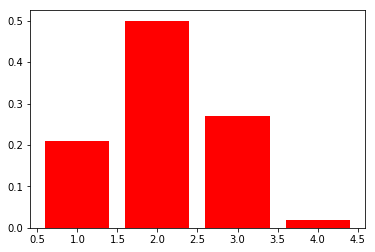

In [4]:
N = 100 # On souhaite generer N nombres aléatoires
U = sim.ranf(N) # On genere N nombres suivant la loi uniforme sur [0,1]

def F(u):
    """La fonction réciproque de la fonction de répartion"""
    y = 1 * (u <= 1/5) + 2 * ((1/5 < u) * (u <= 7/10)) + \
        3 * ((7/10 < u) * (u <= 19/20)) + 4 * ((19/20 < u) * (u <= 1))
    return y

X = F(U) # Simulation de la var X
# Vecteurs qui va contenir les frequences d'occurence de chaque élément de l'univers
frequences = np.arange(0, 4, dtype = float)
for i in range(0,4):
    frequences[i] = (np.sum(1 * (X == i+1))) / N
# Dessinons l'histogramme des fréquences
larg = 0.8 # largeur des rectangles de l'histogramme
ax1 = np.arange(1, 5)
hist = plt.bar(ax1, frequences, larg, color = 'r')
plt.show(hist)

### Loi exponentielle

In [5]:
lbda = 2 # Pramètre lambda = 2
V = sim.ranf(N) # Simulation de N valeurs suivant une loi uniforme indépendante de U
def IG(x):
    # remplacer les valeurs négatives par 1, sinon garder la meme valeur
    x = x * (x > 0) + 1 * (x <= 0)
    y = -(1/lbda) * np.log(x)
    return y
Y = IG(V)
Z = Y ** X
Esperence = np.mean(Z)
print(f'Esperence = {Esperence}')

Esperence = 0.403340329526819


### Simulation des trajectoires d'un sous-jacent suivant le modèle Black & Scholes

Pour cela on peut utiliser le schema d'Euler pour l'EDS suivante :

$dS_{t}=\mu S_{t}\,dt+\sigma S_{t}\,dW_{t}\,$ où $W_{t}$ est processus Brownien
ou directement la formule $S_{t} = S_{0}\,exp(\sigma B_{t} + (\mu - \sigma^2 /2)t)$

Estimation numérique de l'esperence à la date T = 109.0657962424945
Esperence = 134.9858807576003


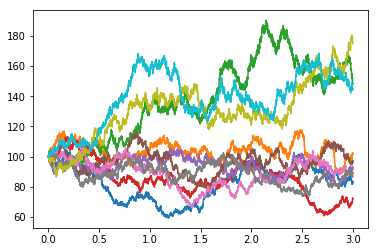

In [6]:
T = 3
n = 10000 # discretiser le temps
pas = T/n
N = 10 # Nombre de trajectoires à simuler
S0 = 100 # la valeur actuelle de l'action sous-jacente
sigma = 0.2 # la volatilité du prix de l'action
mu = 0.1 # drift
S = S0 * np.ones((n+1, N))
W = np.zeros((n+1, N))
dates = np.linspace(0, T, n+1)

for j in range(N):
    for i in range(1, n+1):
        W[i, j] = W[i-1, j] + np.sqrt(pas) * sim.randn()
        S[i, j] = S0 * (np.exp(sigma * W[i, j] + (mu - (sigma ** 2)/2) * dates[i]))

print(f'Estimation numérique de l\'esperence à la date T = {np.mean(S[n, :])}')
print(f'Esperence = {np.exp(mu * T) * S0}')
graph2 = plt.plot(dates, S)
plt.show(graph2)

### Modèle stochastique à volatilité locale

Simulons les trajectoires via le schéma d'Euler de l'actif risqué vérifiant la dynamique $dS_{t}=\mu(t,S_{t}) S_{t}\,dt+\sigma(t,S_{t}) S_{t}\,dW_{t}\,$ où $W_{t}$ est processus Brownien et $S_{0}$ donné

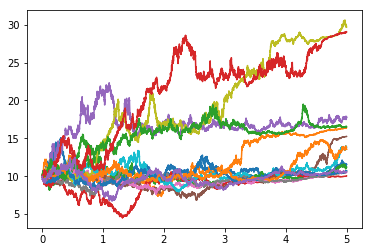

In [7]:
T = 5
n = 10000
pas = T/n
N = 15
S0 = 10
S = S0 * np.ones((n+1, N))
dates = np.linspace(0, T, n+1)

def sigma(t, x):
    return (0.1 * (1 + (T - t)/2 + np.cos(x)))
def mu(t, x):
    return 0.05 + t/100

for j in range(N):
    for i in range(1, n+1):
        x = S[i-1, j]
        t = dates[i-1]
        S[i, j] = x + (sigma(t, x) * x * np.sqrt(pas) * sim.randn()) + \
            (mu(t, x) * x * pas)
graph3 = plt.plot(dates, S)
plt.show(graph3)

### Modèle de Vasicek

On suppose que le taux r définissant $S^0$ vérifie la dynamique 
$dr_{t}=a(b - r_{t})dt+\sigma\,dW_{t}\,$ avec
$r_{0}$ = 6\%, 
a = 0.3, 
b = 8\% et $\sigma$ = 10\%

Modélisons les trajectoires de $r_{t}$
En déduire des trajectoires pour $S_{t}^0$

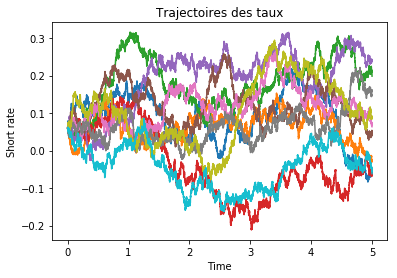

In [8]:
T = 5
n = 10000
pas = T/n
N = 10
# Paramètres du modèle
r0 = 0.06
a = 0.3
b = 0.08
sig = 0.1
####
R = r0 * np.ones((n+1, N))
dates = np.linspace(0, T, n+1)

for j in range(N):
    for i in range(1, n+1):
        R[i, j] = R[i-1, j] + a * (b - R[i-1, j]) * pas + \
                sig * np.sqrt(pas) * sim.randn()
graph4 = plt.plot(dates, R)
plt.title('Trajectoires des taux')
plt.ylabel('Short rate')
plt.xlabel('Time')
plt.show(graph4)

#### Trajectoires pour $S_{t}^0 = S_{0}^0 \, exp(\int_{0}^{t} r_{u} \, \mathrm{d}u)$

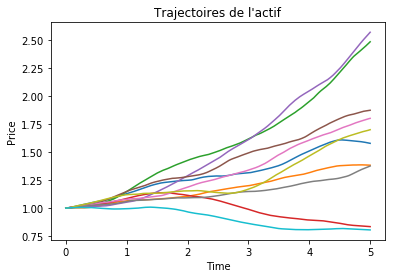

In [11]:
S0 = 1
S_zero = S0 * np.ones((n+1, N))
for j in range(N):
    for i in range(1, n+1):
        # le calcul de l'intégrale se fait par la somme de riemann
        S_zero[i, j] = S0 * np.exp(pas * np.sum(R[0:i, j]))
graph5 = plt.plot(dates, S_zero)
plt.title('Trajectoires de l\'actif')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show(graph5)

### Problème de Pricing

#### Travail 1

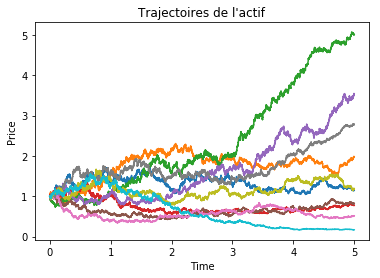

In [15]:
T = 5
n = 10000
pas = T/n
N = 10
S0 = 1
# Paramètres du modèle de Vasicek (on re-simule pour utiliser le meme bruit)
r0 = 0.06
a = 0.3
b = 0.08
sig = 0.1
####
def sigma(t, x):
    return (0.1 * (1 + (T - t)/2 + np.cos(x)))

dates = np.linspace(0, T, n+1)
R = r0 * np.ones((n+1, N))
S_tilde = S0 * np.ones((n+1, N))
S_t = S0 * np.ones((n+1, N))
for j in range(N):
    for i in range(1, n+1):
        bruit = sim.randn()
        t = dates[i-1]
        x = R[i-1, j]
        R[i, j] = x + a * (b - x) * pas + sig * np.sqrt(pas) * bruit
        x = S_tilde[i-1, j]
        S_tilde[i, j] = x + x * sigma(t, x) * np.sqrt(pas) * bruit
        S_t[i, j] = S_tilde[i, j] * S_zero[i, j]
graph6 = plt.plot(dates, S_t)
plt.title('Trajectoires de l\'actif')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show(graph6)

#### Travail 2 : pricing d'un call asiatique

In [21]:
K = 3 # Strike price
payoffs = np.zeros(N)
for j in range(N):
    payoffs[j] = np.maximum(0.0, (pas * np.sum(S_t[:, j])) - K)
esperence = np.mean(payoffs/S_zero[n, :])
print(f'Prix du call asiatique de maturité T = {T} et de prix d\'exercice K = {K} est : {esperence}')

Prix du call asiatique de maturité T = 5 et de prix d'exercice K = 3 est : 1.9088854076522672
